# Introduction

The goal of this project was to analyse the the data on GDP and life expectancy provided by the WHO and the World Bank to identify the relationship between GDP and life expectancy of six countries.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

Has life expectancy increased over time in each nation?

Has GDP increased over time in the six nations?

Is there a correlation between GDP and life expectancy of a country?

What is the average life expectancy in each country?

# Import Python Modules

First import the python modules that will be used for this project:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and Initial Data Analysis

The dataset is loaded into a dataframe using pandas in order to explore and visualise the data with python. 'all_data.csv' is read in as a dataframe called 'all_data'. The dataframe is then looked at using '.tail()' to get some initial analysis.

In [2]:
all_data = pd.read_csv('all_data.csv')

In [3]:
display(all_data.tail())

,Country,Year,Life expectancy at birth (years),GDP
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10
95,Zimbabwe,2015,60.7,1.630467e+10


The above dataframe shows the contents of the 'all_data.csv' file. The dataset has 4 columns which contain:

- Country - The country the row of data is refrencing.
- Year - The year the row of data is refrencing.
- Life expectancy at birth (years) - The life expectancy of people who live in that country born in that year.
- GDP - The gross domestic product of the country in that year.

This dataset has also has 95 rows of data.

Next, some further exploration of the data was conducted.

In [4]:
display(all_data.describe())

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


The above summary statistics show us some intresting insights:

- the range of years is 2000-2015
- The average life expectancy across the six countries is 72.79 but the middle (median) life expectancy is 76.75. This indercates that there may be outliers in the data.

In [5]:
display(all_data.Country.unique())

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

There are six countries in the data which are listed above.

# Question 1

Has life expectancy increased over time in each nation?

The first step was to plot each nation on a graph to see how there life expectancy has changed over time.

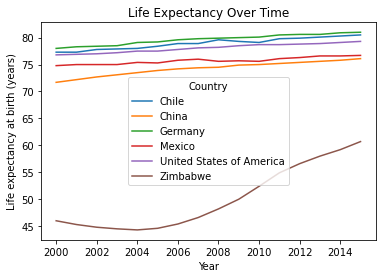

<Figure size 432x288 with 0 Axes>

In [6]:
sns.lineplot(data=all_data, x='Year', y='Life expectancy at birth (years)', hue='Country').set(title='Life Expectancy Over Time')
plt.show()
plt.clf()

This graph is hard to read as Zimbabwe is an outlier to the rest of the data. The next step was to plot each nation again without Zimbabwe to get a better look at the other countries.

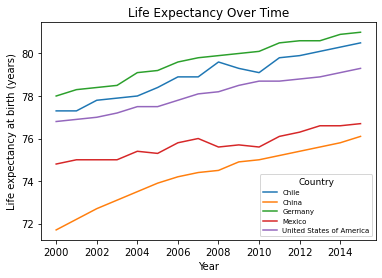

<Figure size 432x288 with 0 Axes>

In [7]:
all_data_less_Zimbabwe = all_data[all_data.Country != 'Zimbabwe']
ax = sns.lineplot(data=all_data_less_Zimbabwe, x='Year', y='Life expectancy at birth (years)', hue='Country').set(title='Life Expectancy Over Time')
plt.legend(title='Country', fontsize='7', title_fontsize='9')
plt.show()
plt.clf()

The data visualisations show that life expectancy has increased in all 6 nations from 2000 to 2015. It has not always been a constant increase however with Zimbabwe for example having a decreasing life expectancy from 2000 to 2004 before increasing again.

# Question 2

Has GDP increased over time in the six nations?

The first step was to plot each nation on a graph to see how GDP has changed over time.

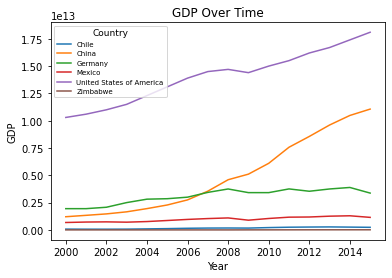

<Figure size 432x288 with 0 Axes>

In [8]:
sns.lineplot(data=all_data, x='Year', y='GDP', hue='Country').set(title='GDP Over Time')
plt.legend(title='Country', fontsize='7', title_fontsize='9')
plt.show()
plt.clf()

Like the first question, plotting all the countries on the same graph makes it hard to read the individual data. For this question every country was then plotted on its own graph to see trends more clearly.

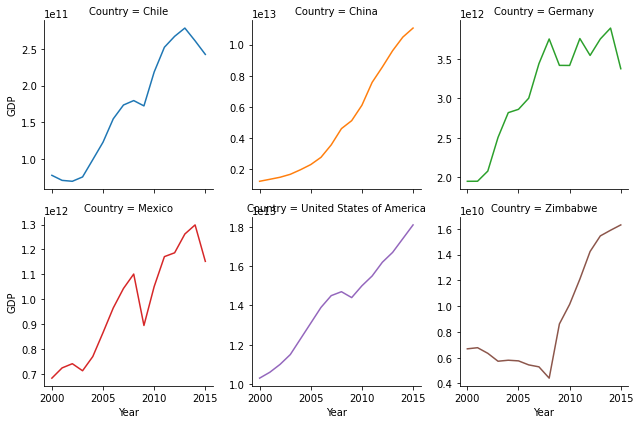

In [9]:
g = sns.FacetGrid(all_data, col='Country', col_wrap=3, hue='Country', sharey = False)
g.map(sns.lineplot,'Year','GDP')

The graphs above show that GDP has increased in all 6 countries since 2000. China and the USA have shown consistant increased growth in their GDP over this period. Other countries such as Germany and Chile have higher GDP's in 2015 than 2000 yet 2015 is not their highest year in terms of GDP. Note that the scales used for the graphs of the individual countries are different. You can see on the first graph that some of the countries have GDP a lot higher than others.

# Question 3

Is there a correlation between GDP and life expectancy of a country?

Again the first step was to graph all the countries on the same graph to see how they compared with each other.

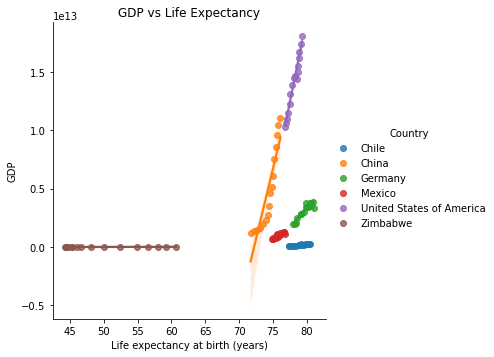

<Figure size 432x288 with 0 Axes>

In [10]:
sns.lmplot(data=all_data, x='Life expectancy at birth (years)', y='GDP', hue='Country').set(title='GDP vs Life Expectancy')
plt.show()
plt.clf()

While the above chart with all countries does show you that China and the USA have strong positive correlations, it makes it hard to see anything useful from the other countries. The countries were plotted on separate graphs shown below.

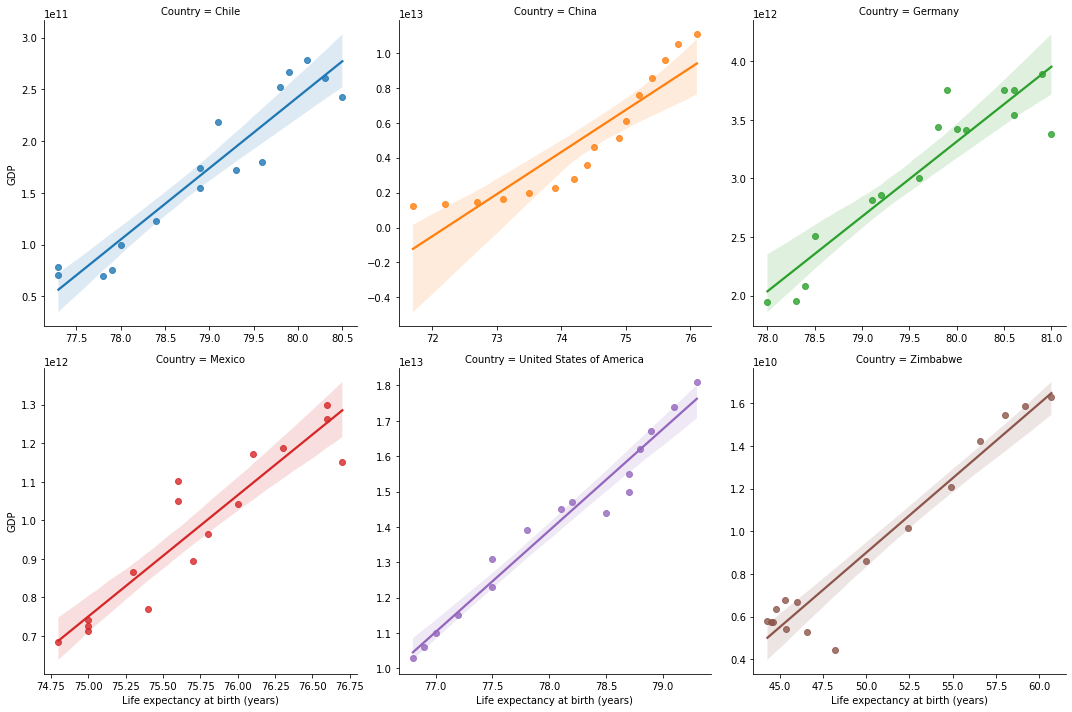

In [11]:
sns.lmplot(data=all_data, x='Life expectancy at birth (years)', y='GDP', hue='Country', col='Country', col_wrap=3, facet_kws=dict(sharex=False, sharey=False))

The graphs of the different countries above all show a clear positive correlation between GDP and life expectancy. That means if GDP goes up so does life expectancy and vice-versa.

# Question 4

What is the average life expectancy in each country?

This question is answered with the code below for each country.

In [18]:
data_zimbabwe = all_data[all_data.Country == 'Zimbabwe']
data_USA = all_data[all_data.Country == 'United States of America']
data_chile = all_data[all_data.Country == 'Chile']
data_china = all_data[all_data.Country == 'China']
data_germany = all_data[all_data.Country == 'Germany']
data_mexico = all_data[all_data.Country == 'Mexico']
avg_life_expectancy_Zimbabwe = np.mean(data_zimbabwe['Life expectancy at birth (years)'])
avg_life_expectancy_USA = np.mean(data_USA['Life expectancy at birth (years)'])
avg_life_expectancy_Chile = np.mean(data_chile['Life expectancy at birth (years)'])
avg_life_expectancy_China = np.mean(data_china['Life expectancy at birth (years)'])
avg_life_expectancy_Germany = np.mean(data_germany['Life expectancy at birth (years)'])
avg_life_expectancy_Mexico = np.mean(data_mexico['Life expectancy at birth (years)'])
print('The average life expectancy in Zimbabwe is: ' + str(round(avg_life_expectancy_Zimbabwe, 2)) + ' years')
print('The average life expectancy in USA is: ' + str(round(avg_life_expectancy_USA, 2)) + ' years')
print('The average life expectancy in Chile is: ' + str(round(avg_life_expectancy_Chile, 2)) + ' years')
print('The average life expectancy in China is: ' + str(round(avg_life_expectancy_China, 2)) + ' years')
print('The average life expectancy in Germany is: ' + str(round(avg_life_expectancy_Germany, 2)) + ' years')
print('The average life expectancy in Mexico is: ' + str(round(avg_life_expectancy_Mexico, 2)) + ' years')

The average life expectancy in Zimbabwe is: 50.09 years
The average life expectancy in USA is: 78.06 years
The average life expectancy in Chile is: 78.94 years
The average life expectancy in China is: 74.26 years
The average life expectancy in Germany is: 79.66 years
The average life expectancy in Mexico is: 75.72 years


This data is then visualised on the graph below

AxesSubplot(0.125,0.125;0.775x0.755)


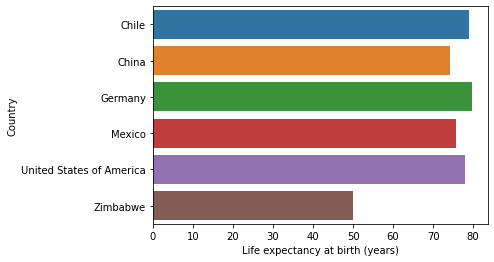

In [13]:
all_data_means = all_data.drop('Year', axis=1).groupby('Country').mean().reset_index()
print(sns.barplot(data=all_data_means, x="Life expectancy at birth (years)", y="Country"))

This graph shows all the countries have similar life expectancies except for Zimbabwe which is way lower.

# Conclusions

This project was able to take the data provided and answer the questions posed at the start using statistical techniques and data visualizations.

Has life expectancy increased over time in the six nations?

The data shows that life expectancy has increased in all 6 nations from 2000 to 2015. It has not always been a constant increase however with Zimbabwe for example having a decreasing life expectancy from 2000 to 2004 before increasing again.


Has GDP increased over time in the six nations?

GDP has increased in all 6 countries since 2000. China and the USA have shown consistant increased growth in their GDP over this period. Other countries such as Germany and Chile have higher GDP's in 2015 than 2000 yet 2015 is not their highest year in terms of GDP.


Is there a correlation between GDP and life expectancy of a country?

There is a clear positive correlation between GDP and life expectancy. That means if GDP goes up so does life expectancy and vice-versa.


What is the average life expectancy in these nations?

The average life expectancy in Zimbabwe is: 50.09 years
The average life expectancy in USA is: 78.06 years
The average life expectancy in Chile is: 78.94 years
The average life expectancy in China is: 74.26 years
The average life expectancy in Germany is: 79.66 years
The average life expectancy in Mexico is: 75.72 years


What is the distribution of that life expectancy?

All the countries have a similar distribution of life expectancy (75-80years) except for Zimbabwe which is 50years

# Further Research

The data provided only included six countries. Having more countries in the data would mean you would be able to comparisions on other relationships like continents.